# **Tutorial Parte 0: Conhecendo o MNE**


In [1]:
!pip install mne

     |████████████████████████████████| 6.9 MB 4.0 MB/s 


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%matplotlib inline
import mne 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [4]:
data_name = "oddball_example_small-fif.gz"

#Exemplo de dado retirado do bootcamp

1.1 Visualização dos dados e objetos puros

In [5]:
cd /gdrive/MyDrive/MNETutorialDataSets

/gdrive/MyDrive/MNETutorialDataSets


In [6]:
raw = mne.io.read_raw_fif(data_name, preload=True)

Opening raw data file oddball_example_small-fif.gz...


<ipython-input-6-41ef88fb0ba0>:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(data_name, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


*Nota 1:* Testar os métodos possíveis de modificar o objeto a partir do comando ```raw.algumaCoisa```;

Ao digitar ```raw.algumaCoisa?``` é aberta uma janela com detalhes do comando.



In [7]:
raw.filter(1, 20)
type(raw)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



mne.io.fiff.raw.Raw

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


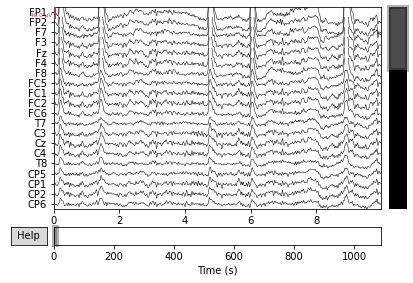

In [8]:
raw.plot();

#Procurar resolver bug visual do tamanho da imagem

Retângulos em vermelho representam os artifacts

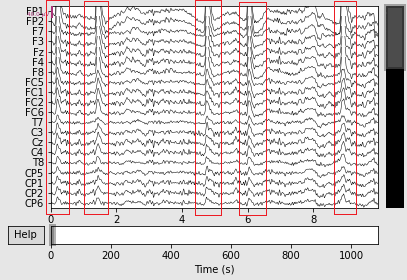

In [9]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

<ipython-input-9-d5ac3de0024b>:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=20, random_state=0)


In [10]:
ica.fit(raw.copy().filter(8,35))

#Filtrandos das ondas alfa até delta

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 12.4s.


<ICA | raw data decomposition, fit (fastica): 109098 samples, 20 components, channels used: "eeg">

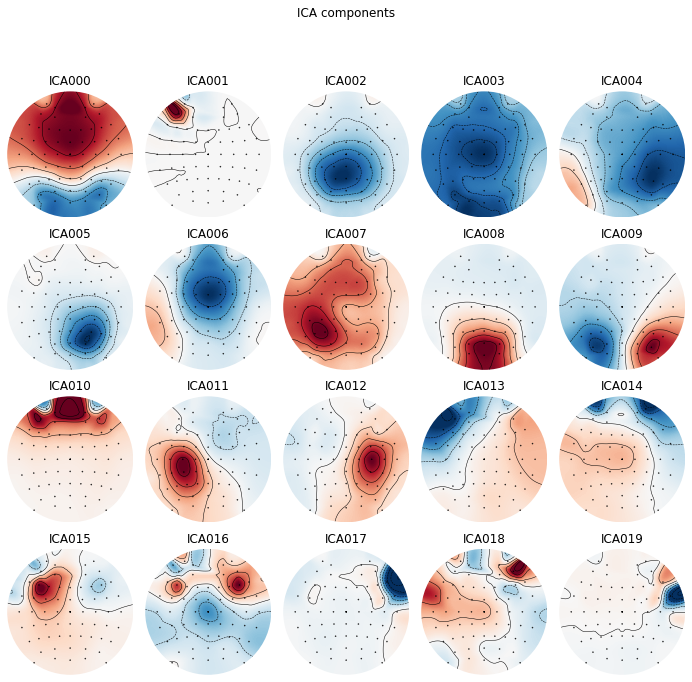

[<MNEFigure size 702x696.24 with 20 Axes>]

In [11]:
ica.plot_components(outlines='skirt')

In [12]:
ica.exclude = [1, 10, 14, 17, 18, 19]

#Canais que interferem e produzem os artifacts
#Analisar os algoritmos prontos que fazem isso 

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


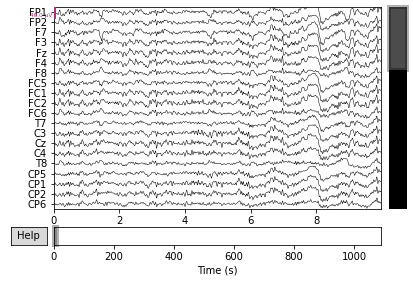

In [13]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

# Épocas

In [14]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


<Figure size 640x480 with 0 Axes>

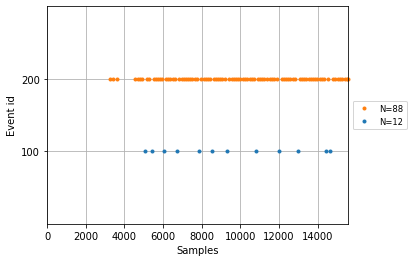

In [17]:
figure(figsize=(8, 6), dpi=80)
mne.viz.plot_events(events[:100]);

Eventos são divisões no domínio temporal que dividem o gráfico em épocas, neste caso o `ID=100` representa uma **anomalia**, e são nelas que os estudos podem ser analisados.

Para criar um objeto do tipo `mne.Epochs` é necessário de um objeto do tipo `raw` e o array dos `events`, dado como um **dicionário** relacionando o nome das condições ao ID.



In [23]:
events_ids = {"standart":200, "target":100}

epochs = mne.Epochs(raw, events, event_id=events_ids, preload=True)

#Dicionário alocando cada evento id a uma condição

Not setting metadata
Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 903 events and 71 original time points ...
0 bad epochs dropped


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


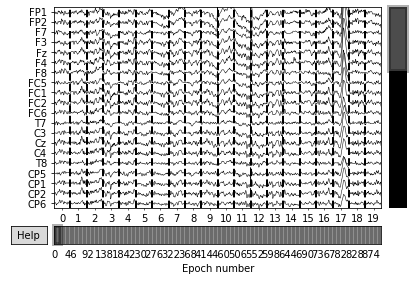

In [24]:
epochs.plot();

In [25]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-25-6221a76f7f3f>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [26]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,903
Events,standart: 797target: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


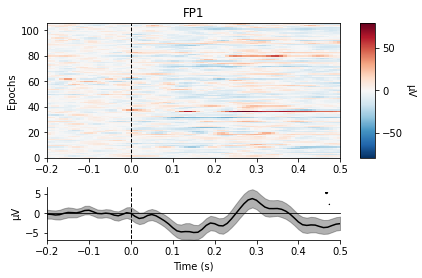

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


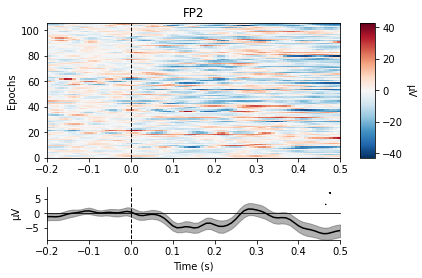

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


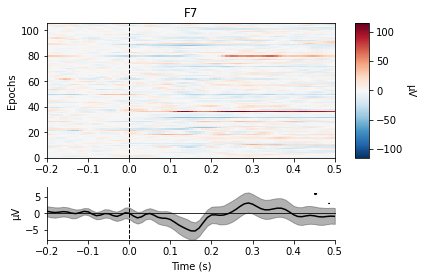

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


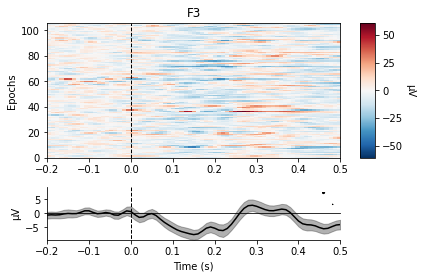

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


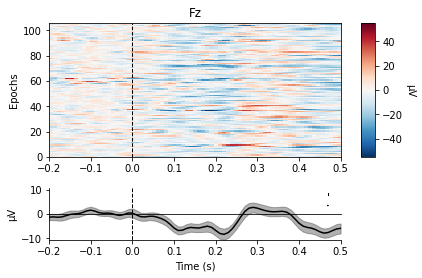

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


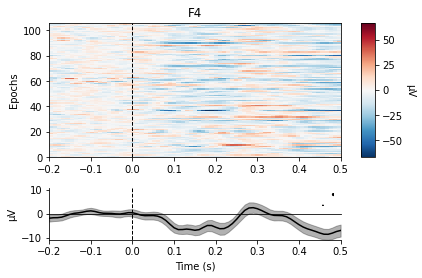

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


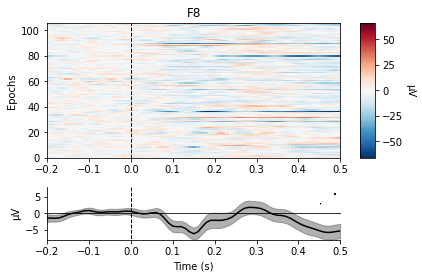

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


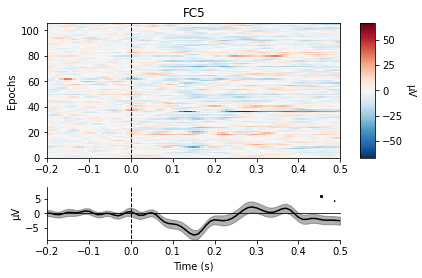

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


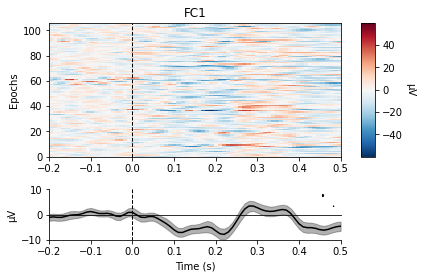

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


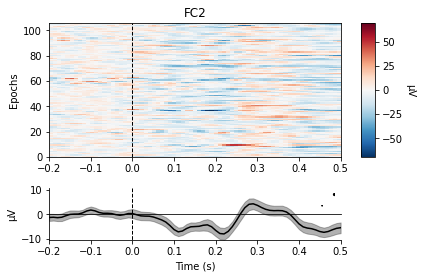

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


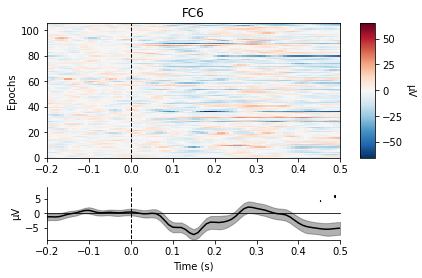

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


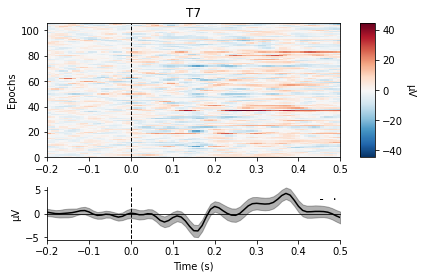

Not setting metadata
Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


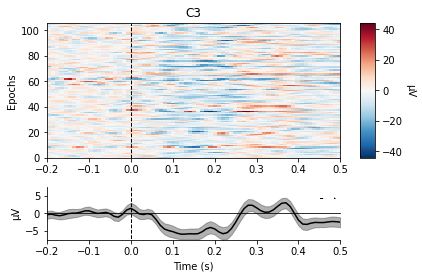

In [29]:
#Analisar cada canal e visualizar as diferenças principalmente no gráfico de tensão

for i in range(13):
  epochs["target"].plot_image(picks=[i]);

In [31]:
epochs.equalize_event_counts(events_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

Number of events,212
Events,standart: 106target: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


Pré-Processamento está pronto, necessário salvas para não realizas posteriormente